## Question 1 - Part 1 : Sales and Profitability Analysis

## 1. Merge the List of Orders and Order Details datasets on the basis of Order ID. Calculate the total sales (Amount) for each category across all orders.

In [219]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 

In [235]:
data = pd.read_excel(r"C:\Users\kkris\Desktop\Order_Details_1.xlsx")
data2 = pd.read_excel(r"C:\Users\kkris\Desktop\List_of_Orders_1.xlsx")

In [221]:
merged = pd.merge(data2, data, on ='Order ID', how ='inner')
merged.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275,-1148,7,Furniture,Bookcases
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,Stole
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Hankerchief
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168,-111,2,Electronics,Phones


In [222]:
merged['Category'].unique()

array(['Furniture', 'Clothing', 'Electronics'], dtype=object)

In [236]:
print("The total sales (Amount) for each category across all orders:")
print("_____________________________________________________________")
total_sales = merged.groupby('Category')['Amount'].sum().reset_index()
total_sales

The total sales (Amount) for each category across all orders:
_____________________________________________________________


,Category,Amount
0,Clothing,139054
1,Electronics,165267
2,Furniture,127181


THE TOTAL SALES(Amount) FOR EACH CATEGORY ACROSS ALL ORDERED :


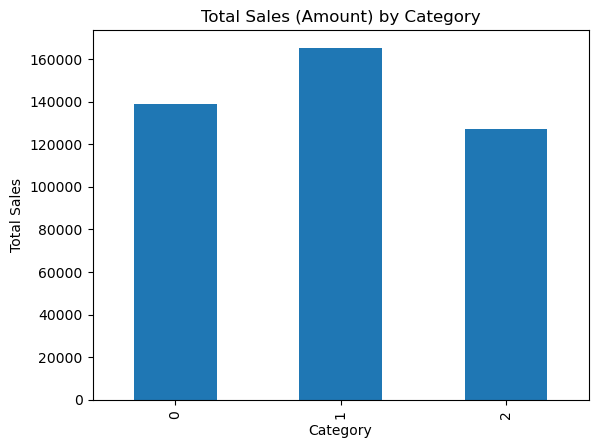

In [224]:
print("THE TOTAL SALES(Amount) FOR EACH CATEGORY ACROSS ALL ORDERED :")


total_sales["Amount"].plot(x ='Category', y ='Amount', kind ='bar')
plt.title('Total Sales (Amount) by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

## 2. For each category, calculate the average profit per order and total profit margin (profit as a percentage of Amount)..

In [225]:
total_profit_for_each_category =  merged.groupby('Category')['Profit'].sum().reset_index()
total_profit_for_each_category

,Category,Profit
0,Clothing,11163
1,Electronics,10494
2,Furniture,2298


In [226]:
category_stats = merged.groupby('Category').agg(
    total_sales = ('Amount', 'sum'),
    total_profit_for_each = ('Profit', 'sum'),
    avg_profit_per_order = ('Profit', 'mean')
).reset_index()

category_stats['total_profit_margin_percent'] = (category_stats['total_profit_for_each'] / category_stats['total_sales']) * 100
print("AVERAGE PROFIT PER ORDER AND TOTAL PROFIT MARGIN")
print("_________________________________________________")
category_stats

AVERAGE PROFIT PER ORDER AND TOTAL PROFIT MARGIN
_________________________________________________


,Category,total_sales,total_profit_for_each,avg_profit_per_order,total_profit_margin_percent
0,Clothing,139054,11163,11.762908,8.027817
1,Electronics,165267,10494,34.071429,6.349725
2,Furniture,127181,2298,9.456790,1.806874


AVERAGE PROFIT PER ORDER: 
_________________________________________________


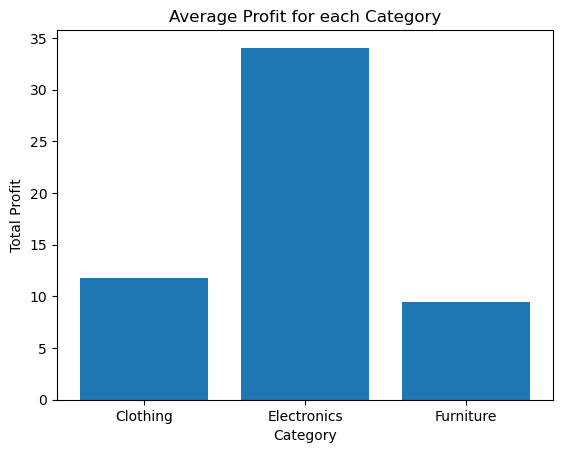

In [227]:
plt.bar(category_stats['Category'], category_stats['avg_profit_per_order'])
plt.title('Average Profit for each Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')

print("AVERAGE PROFIT PER ORDER: ")
print("_________________________________________________")

plt.show()

TOTAL PROFIT MARGIN:


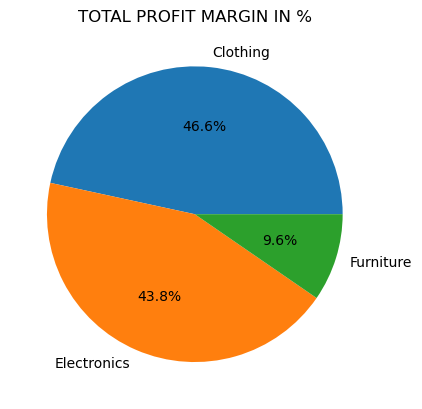

In [228]:
print("TOTAL PROFIT MARGIN:")
plt.pie(category_stats['total_profit_for_each'], labels = category_stats['Category'], autopct='%.1f%%')
plt.title("TOTAL PROFIT MARGIN IN %")
plt.show()

## 3. Identify the top-performing and underperforming categories based on these metrics. Also, suggest reasons for their performance diEerences.

In [237]:
subcategories = merged.groupby('Category')['Sub-Category'].unique().reset_index()
subcategories_exploded = subcategories.explode('Sub-Category').reset_index(drop=True)

print(subcategories_exploded)

       Category      Sub-Category
0      Clothing             Stole
1      Clothing       Hankerchief
2      Clothing             Saree
3      Clothing          Trousers
4      Clothing             Kurti
5      Clothing           T-shirt
6      Clothing             Shirt
7      Clothing          Leggings
8      Clothing             Skirt
9   Electronics  Electronic Games
10  Electronics            Phones
11  Electronics          Printers
12  Electronics       Accessories
13    Furniture         Bookcases
14    Furniture            Chairs
15    Furniture            Tables
16    Furniture       Furnishings


In [238]:
## Shows all sub-cateogries available

subcat_stats = merged.groupby(['Category', 'Sub-Category']).agg(
    total_sales=('Amount', 'sum'),
    total_profit=('Profit', 'sum'),
    avg_profit_per_order=('Profit', 'mean')
).reset_index()
subcat_stats

,Category,Sub-Category,total_sales,total_profit,avg_profit_per_order
0,Clothing,Hankerchief,14608,2098,10.595960
1,Clothing,Kurti,3361,181,3.851064
2,Clothing,Leggings,2106,260,4.905660
3,Clothing,Saree,53511,352,1.676190
4,Clothing,Shirt,7555,1131,16.391304
5,Clothing,Skirt,1946,235,3.671875
6,Clothing,Stole,18546,2559,13.328125
7,Clothing,T-shirt,7382,1500,19.480519
8,Clothing,Trousers,30039,2847,73.000000
9,Electronics,Accessories,21728,3559,49.430556


In [231]:
category_stats = subcat_stats.groupby('Category').agg(
    total_sales=('total_sales', 'sum'),
    total_profit=('total_profit', 'sum')
).reset_index()

top_performing = category_stats.sort_values('total_profit', ascending=False).head(3)
top_performing

,Category,total_sales,total_profit
0,Clothing,139054,11163
1,Electronics,165267,10494
2,Furniture,127181,2298


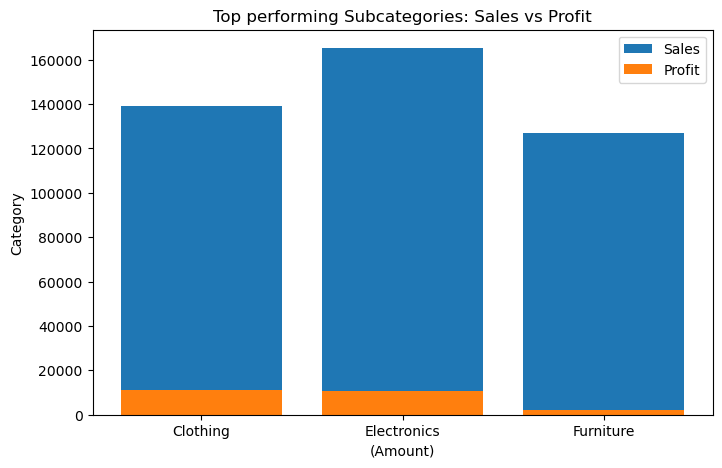

In [232]:
plt.figure(figsize = (8,5))

plt.bar(top_performing['Category'], top_performing['total_sales'], label ='Sales')
plt.bar(top_performing['Category'], top_performing['total_profit'], label ='Profit')

plt.title('Top performing Subcategories: Sales vs Profit')
plt.xlabel('(Amount)')
plt.ylabel('Category')
plt.legend()
plt.show()

In [233]:
underperforming_3_cat = subcat_stats.sort_values('total_profit', ascending=True).head(3)

print("Tables are most underperforming Sub Category under Furniture Category.")
print("______________________________________________________________________")
underperforming_3_cat

Tables are most underperforming Sub Category under Furniture Category.
______________________________________________________________________


,Category,Sub-Category,total_sales,total_profit,avg_profit_per_order
16,Furniture,Tables,22614,-4011,-235.941176
10,Electronics,Electronic Games,39168,-1236,-15.645570
1,Clothing,Kurti,3361,181,3.851064


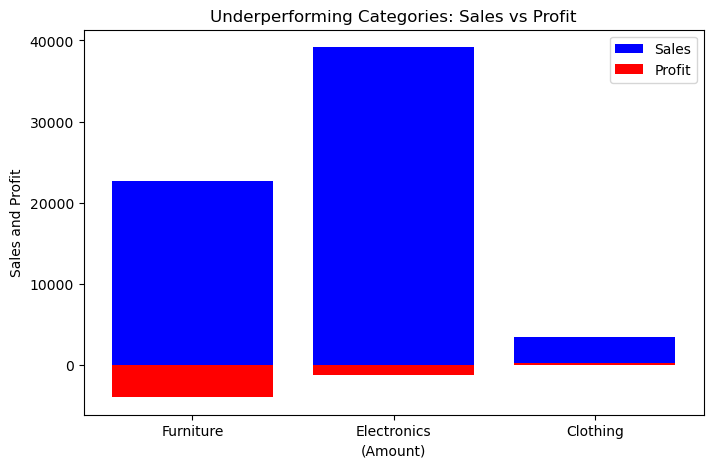

In [234]:
plt.figure(figsize = (8,5))

plt.bar(underperforming_3_cat['Category'], underperforming_3_cat['total_sales'], label = 'Sales', color = 'blue')
plt.bar(underperforming_3_cat['Category'], underperforming_3_cat['total_profit'], label = 'Profit', color = 'red')

plt.title('Underperforming Categories: Sales vs Profit')
plt.xlabel('(Amount)')
plt.ylabel('Sales and Profit')
plt.legend()
plt.show()

### Reasons for their performance differences, 

**TOP-PERFORMING CATEGORY :** 
Clothing(Reason for Top performance):

- Clothing performs strongly because it includes high demand apparel items such as Sarees, Kurtis, and Trousers, which consistently generate significant sales across both online and retail channels.
- Repeat purchases and seasonal demand cycles (festivals, weddings, and cultural events) contribute to a stable and recurring revenue stream.
- Accessories within clothing (like scarves and stoles) also drive complementary sales, boosting the overall profit margin.
- This combination of high individual product demand, recurring seasonal purchases, and cross product sales makes Clothing the top performing category overall.

*Talking about Trousers being the Top-performing Sub category of Clothing*

- Pricing is moderate, making them accessible to a wider customer base compared to high-cost clothing items, which helps maintain a healthy profit margin.
- Trousers perform strongly due to consistent year-round demand for everyday wear, both in casual and formal segments.

______________________________________________________________________________________________________________________

**UNDERPERFORMING CATEGORY :**
Furniture(Reason for Underperformance):

- Furniture underperforms because it consists of high-cost, bulky items that require more consideration before purchase. Customers often delay buying due to space constraints, shipping difficulties, and seasonal demand fluctuations.
- Unlike apparel or electronics, furniture items do not require frequent replacement, reducing recurring sales opportunities.
- Additionally, the rise of compact or multifunctional furniture has shifted demand away from traditional tables and bookcases, further limiting sales volume.
- These factors combined — high cost, low replacement frequency, and changing customer preferences — result in lower sales and profit margins, making Furniture the underperforming category.

*Talking about the tables being most underperfroming Sub Category of Furniture*

- Tables underperform because they are high cost, bulky items that require more consideration before purchase.
- Customers often delay buying tables due to space constraints, shipping costs, and seasonal demand fluctuations.
- Moreover, tables do not require frequent replacement, and the rise of compact or multifunctional furniture has reduced demand for traditional tables, leading to lower sales volume and profit margin.

______________________________________________________________________________________________________________________
**Quick Takeaways:**

- Top Performing Category with it's Sub-Category respectively - Clothing, Trousers.
- Top Performing Sub-Category - Printers (Electronics).

- Most UnderPerforming Category - Furniture.
- Most UnderPerforming Sub-Category - Tables.